In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("house_train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

In [3]:
display(X_train.head())
display(y_train.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
588,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,Inside,...,60,0,NaN,NaN,NaN,0,6,2009,WD,Partial
251,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,...,153,0,NaN,NaN,NaN,0,12,2007,WD,Family


,Id,SalePrice
81,82,153500
1418,1419,124000
1212,1213,113000
588,589,143000
251,252,235000


In [7]:
X_train.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
FireplaceQu      553
LotFrontage      212
GarageCond        61
GarageType        61
GarageYrBlt       61
GarageFinish      61
GarageQual        61
BsmtExposure      30
BsmtFinType1      29
BsmtCond          29
BsmtQual          29
BsmtFinType2      29
MasVnrArea         6
MasVnrType         6
Electrical         1
LandSlope          0
dtype: int64

In [8]:
X_test.isna().sum().sort_values(ascending=False)[:20]

PoolQC          290
MiscFeature     282
Alley           271
Fence           242
FireplaceQu     137
LotFrontage      47
GarageType       20
GarageFinish     20
GarageQual       20
GarageCond       20
GarageYrBlt      20
BsmtFinType2      9
BsmtCond          8
BsmtExposure      8
BsmtFinType1      8
BsmtQual          8
MasVnrArea        2
MasVnrType        2
RoofStyle         0
RoofMatl          0
dtype: int64

In [13]:
X_train = X_train.select_dtypes(exclude = 'object')
X_test = X_test.select_dtypes(exclude = 'object')

In [15]:
target = y_train['SalePrice']

In [14]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [17]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(X_train, target, test_size = 0.2, random_state = 2022)

x_tr.shape, x_val.shape, y_tr.shape, y_val.shape

((934, 36), (234, 36), (934,), (234,))

In [18]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [20]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [21]:
rf = RandomForestRegressor()
rf.fit(x_tr, y_tr)
rf_pred = rf.predict(x_val)

xgb = XGBRegressor()
xgb.fit(x_tr, y_tr)
xgb_pred = xgb.predict(x_val)

svr = SVR()
svr.fit(x_tr, y_tr)
svr_pred = svr.predict(x_val)


In [25]:
# 평가지표 : rmse
from sklearn.metrics import mean_squared_error
import numpy as np

print('rf rmse : ', np.sqrt(mean_squared_error(y_val, rf_pred)))
print('xgb rmse : ', np.sqrt(mean_squared_error(y_val, xgb_pred)))
print('svr rmse : ', np.sqrt(mean_squared_error(y_val, svr_pred)))


rf rmse :  31118.048162003306
xgb rmse :  32126.243695964404
svr rmse :  84959.28288803723


In [26]:
final = RandomForestRegressor()
final.fit(X_train, target)
pred = final.predict(X_test)

In [32]:
sub = pd.DataFrame({'id' : y_test.Id,
             'income' : pred})
sub

,id,income
1380,1381,94614.26
520,521,103775.57
1175,1176,327925.77
351,352,209899.26
1335,1336,170435.76
...,...,...
1283,1284,148709.63
1039,1040,79919.44
61,62,103164.14
1395,1396,309887.93


In [31]:
sub.to_csv('2222.csv', index = False)

In [33]:
pred = rf.predict(X_test)
print('rf rmse : ', np.sqrt(mean_squared_error(y_test['SalePrice'], pred)))

rf rmse :  26458.856170589243


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("insurance.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='charges')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 7), (268, 7), (1070, 2), (268, 2))

In [47]:
display(X_train.head())
display(y_train.head())

,id,age,sex,bmi,children,smoker,region
209,209,40,male,41.230,1,no,northeast
540,540,34,female,38.000,3,no,southwest
747,747,19,male,21.755,0,no,northwest
39,39,60,male,39.900,0,yes,southwest
640,640,33,male,42.400,5,no,southwest


,id,charges
209,209,6610.10970
540,540,6196.44800
747,747,1627.28245
39,39,48173.36100
640,640,6666.24300


In [54]:
display(X_test.head())
display(y_test.head())

,id,age,sex,bmi,children,smoker,region
1088,1088,52,male,47.740,1,no,southeast
1157,1157,23,female,23.180,2,no,northwest
1267,1267,24,male,31.065,0,yes,northeast
506,506,22,male,31.350,1,no,northwest
659,659,57,female,28.785,4,no,northeast


,id,charges
1088,1088,9748.91060
1157,1157,14426.07385
1267,1267,34254.05335
506,506,2643.26850
659,659,14394.39815


In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 66.9+ KB


In [49]:
X_train['region'].value_counts()

southeast    304
northeast    266
southwest    261
northwest    239
Name: region, dtype: int64

In [50]:
X_train.isna().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [51]:
X_test.isna().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [52]:
X_train.describe(include = 'object')

,sex,smoker,region
count,1070,1070,1070
unique,2,2,4
top,male,no,southeast
freq,551,845,304


In [53]:
X_test.describe(include = 'object')

,sex,smoker,region
count,268,268,268
unique,2,2,4
top,female,no,northwest
freq,143,219,86


In [55]:
X_train.drop('id', axis = 1, inplace = True)
X_test.drop('id', axis = 1, inplace = True)

In [59]:
# 라벨인코딩

from sklearn.preprocessing import LabelEncoder

cols = X_train.select_dtypes(include = 'object').columns
le = LabelEncoder()

for col in cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

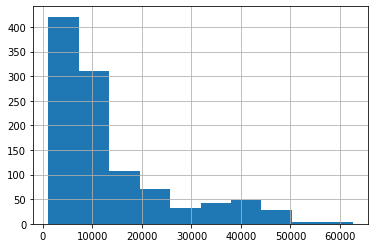

In [60]:
y_train['charges'].hist()

In [61]:
y = np.log1p(y_train['charges'])

In [63]:
#bmi scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train['bmi'] = sc.fit_transform(X_train[['bmi']])
X_test['bmi'] = sc.transform(X_test[['bmi']])

In [64]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(X_train, y, test_size = 0.3, random_state = 2022)

x_tr.shape, x_val.shape, y_tr.shape, y_val.shape

((749, 6), (321, 6), (749,), (321,))

In [69]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [71]:
rf = RandomForestRegressor()
rf.fit(x_tr, y_tr)
rf_pred = rf.predict(x_val)

xgb = XGBRegressor()
xgb.fit(x_tr, y_tr)
xgb_pred = xgb.predict(x_val)

svr = SVR()
svr.fit(x_tr, y_tr)
svr_pred = svr.predict(x_val)

In [72]:
print(np.sqrt(mean_squared_error(y_val, rf_pred)))
print(np.sqrt(mean_squared_error(y_val, xgb_pred)))
print(np.sqrt(mean_squared_error(y_val, svr_pred)))

0.38151669714308345
0.4182203031671166
0.7727843123937715


In [86]:
rf.fit(X_train, y)
pred = rf.predict(X_test)

In [87]:
pred = np.expm1(pred)

In [88]:
pd.DataFrame({'id' : y_test['id'],
             'charges': pred}).to_csv('2022_4.csv', index=False)

In [90]:
print(np.sqrt(mean_squared_error(y_test['charges'], pred)))

4797.041499780739


In [91]:
import pandas as pd
X_test = pd.read_csv("mok_X_test.csv")
X_train = pd.read_csv("mok_X_train.csv")
y_train = pd.read_csv("mok_y_train.csv")

In [92]:
X_train.shape, X_test.shape, y_train.shape

((19158, 13), (2126, 13), (19158, 2))

In [93]:
display(X_train.head(3))
display(X_test.head(3))
display(y_train.head(3))

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15


,enrollee_id,target
0,8949,1
1,29725,0
2,11561,0


In [94]:
X_train.drop('enrollee_id', axis = 1, inplace=True)
X_test.drop('enrollee_id', axis = 1, inplace=True)

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 1.8+ MB


In [97]:
X_train['training_hours'].quantile(0.25)

23.0